# 3. Unsupervised Learning - Markov Modelling
Author: Philip Kalinda

## 3.1 Intro

Markov Modelling explores sequences of states in order to predict the next event given a number of events in the past.

Here we will explore 1st order markov models looking at the state of orders and the sequence of states of properties of these orders within the data provied.

In [1]:
# standards
import numpy as np
import pandas as pd

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
shopColors = ['#EC5D24','#93134A','#F7F5E8','#2B2C30','#336E7B','#F2931A']*2
from matplotlib.colors import LinearSegmentedColormap
cm = LinearSegmentedColormap.from_list('sains', shopColors, N=len(shopColors))
sns.set_palette(shopColors)

# settings
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 60)
pd.set_option('display.latex.repr', True)

In [2]:
# read in data
markovBase = pd.read_csv('datasets/markovBase.csv', index_col = 0)

## 3.2 Weekday Markov Model

### 3.2.1 Models

 Here we explore the day of the week orders are placed and look at what day the next order is likely to follow based on the data provided.
 
 It is important to note that 1st order markov models assume that the next order is dependent only on the last event regardless of all the other previous orders. This assumption seems plausible as one would assume that the next time a customer would look to go shopping is dependent on the last time they shopped and how much food they have left from their previous shop

In [3]:
# list of days with indicies matching the weekdayInteger Feature
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','END']

Here we have a the number of times an order has moved from one state(left) to another(top).

We append another row for the last order. The last order in a sequence is the end of the sequence and cannot move to another state.

In [4]:
weekdayTransitions = markovBase.pivot_table(
    index='weekdayInteger',
    columns='nextOrderWeekdayInteger',
    aggfunc=len)['customerID'].astype(np.float32)
weekdayTransitions = weekdayTransitions.append(
    {'0':0,'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'END':1},
    ignore_index=True)
weekdayTransitions

nextOrderWeekdayInteger,0,1,2,3,4,5,6,END
0,78.0,298.0,188.0,152.0,122.0,84.0,84.0,148.0
1,53.0,111.0,409.0,228.0,221.0,211.0,118.0,228.0
2,66.0,109.0,100.0,398.0,315.0,248.0,182.0,69.0
3,118.0,135.0,98.0,104.0,426.0,322.0,237.0,88.0
4,169.0,187.0,157.0,106.0,229.0,513.0,288.0,110.0
5,261.0,305.0,212.0,154.0,130.0,196.0,463.0,167.0
6,340.0,346.0,251.0,161.0,118.0,129.0,225.0,190.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Here we normalise the values across each state in order to derive probabilities. We also rename the indicies and columns to the name of the day so its easier to see which state we are looking at.

In [5]:
for rownum in range(weekdayTransitions.shape[0]):
    rowsum = weekdayTransitions.iloc[rownum,:].sum()
    for colnum in range(weekdayTransitions.shape[1]):
        weekdayTransitions.iloc[rownum,colnum]=weekdayTransitions.iloc[rownum,colnum]/rowsum
weekdayTransitions.set_index([days], inplace=True)
weekdayTransitions.rename(columns={str(k):v for k,v in enumerate(days)},inplace=True)

In [6]:
weekdayTransitions

nextOrderWeekdayInteger,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,END
Sunday,0.067591,0.258232,0.162912,0.131716,0.105719,0.072790,0.072790,0.128250
Monday,0.033566,0.070298,0.259025,0.144395,0.139962,0.133629,0.074731,0.144395
Tuesday,0.044385,0.073302,0.067249,0.267653,0.211836,0.166779,0.122394,0.046402
Wednesday,0.077225,0.088351,0.064136,0.068063,0.278796,0.210733,0.155105,0.057592
Thursday,0.096077,0.106310,0.089255,0.060262,0.130188,0.291643,0.163729,0.062536
Friday,0.138242,0.161547,0.112288,0.081568,0.068856,0.103814,0.245233,0.088453
Saturday,0.193182,0.196591,0.142614,0.091477,0.067045,0.073295,0.127841,0.107955
END,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
weekdayTransitions

nextOrderWeekdayInteger,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,END
Sunday,0.067591,0.258232,0.162912,0.131716,0.105719,0.072790,0.072790,0.128250
Monday,0.033566,0.070298,0.259025,0.144395,0.139962,0.133629,0.074731,0.144395
Tuesday,0.044385,0.073302,0.067249,0.267653,0.211836,0.166779,0.122394,0.046402
Wednesday,0.077225,0.088351,0.064136,0.068063,0.278796,0.210733,0.155105,0.057592
Thursday,0.096077,0.106310,0.089255,0.060262,0.130188,0.291643,0.163729,0.062536
Friday,0.138242,0.161547,0.112288,0.081568,0.068856,0.103814,0.245233,0.088453
Saturday,0.193182,0.196591,0.142614,0.091477,0.067045,0.073295,0.127841,0.107955
END,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


### 3.2.2 Markov Visualisations

Here we visualise the markov model above in order to better interpret the data.

We can see from the visualizations that the highest probability for each of the states is the following day, the next highest probability is the day after the following day and this tails off. This stays true until sunday where we see that the pobabilty is higher on monday than sunday. This can be due to a number of things. People may not want to shop on sunday or this could be due to closing hours usually being earlier, therefore less orders are taken.

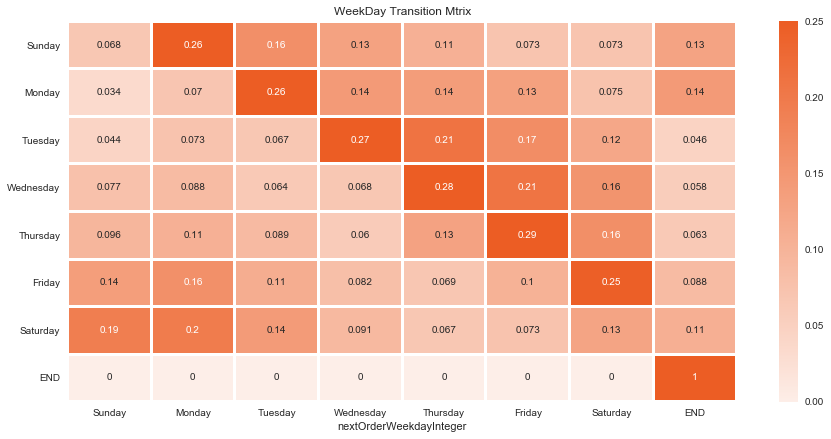

In [8]:
f, ax = plt.subplots(figsize=(15, 7))
cmap = sns.light_palette(shopColors[0], as_cmap=True)
sns.heatmap(
    weekdayTransitions,
    linewidths=2.0,
    ax=ax ,
    annot=True,
    cmap=cmap,
    vmax=.25, vmin=0.0)
ax.set_title('WeekDay Transition Mtrix')
plt.show()

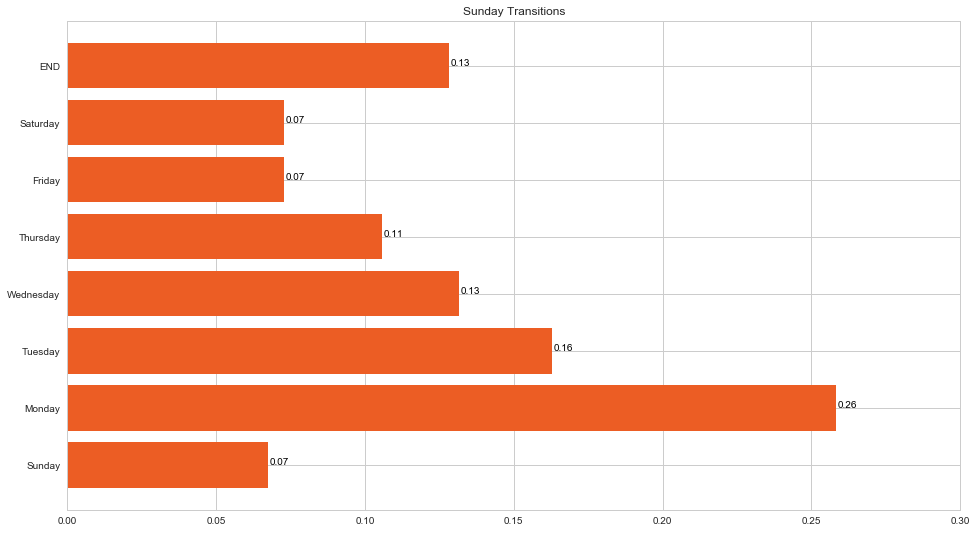

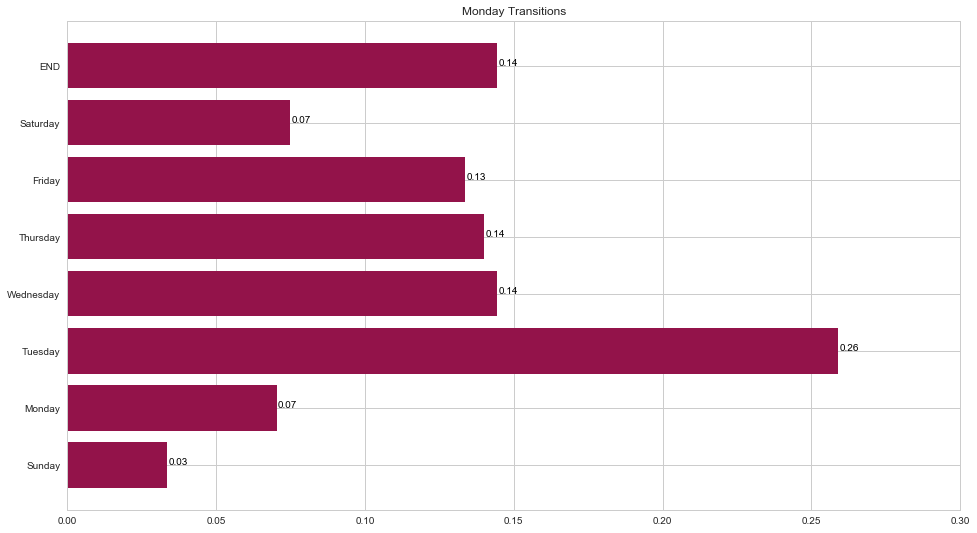

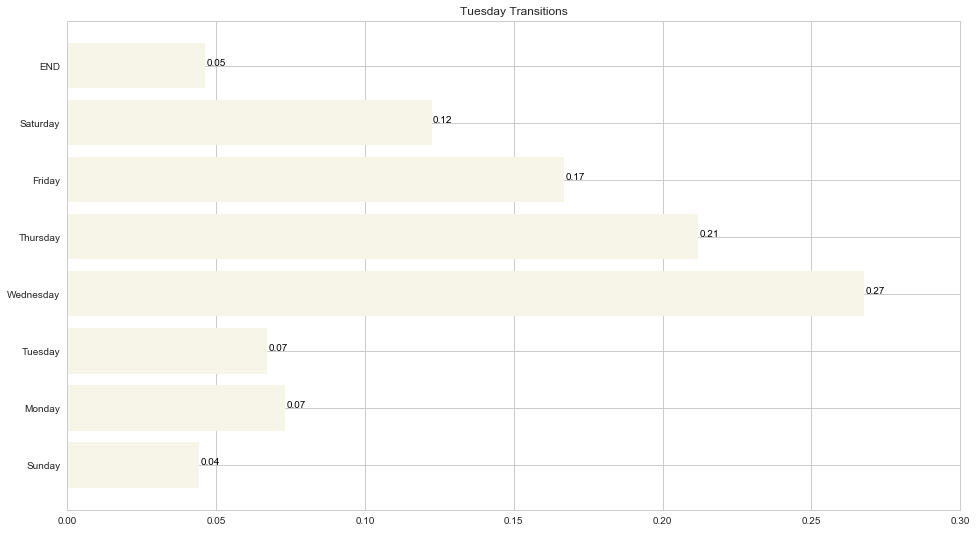

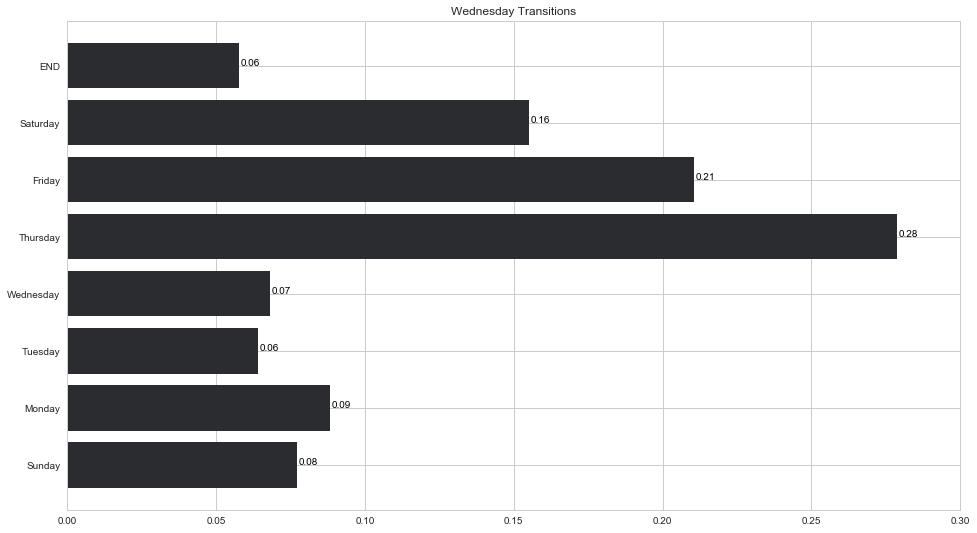

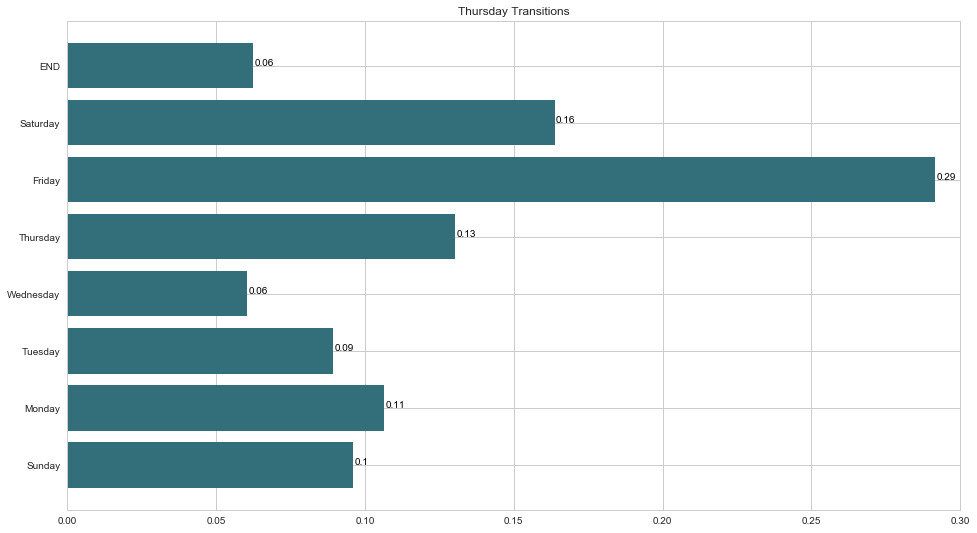

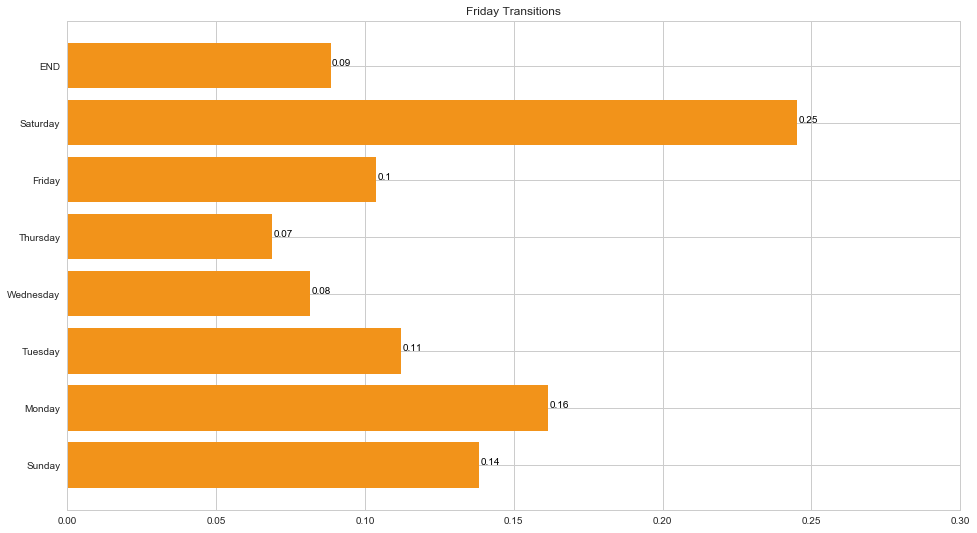

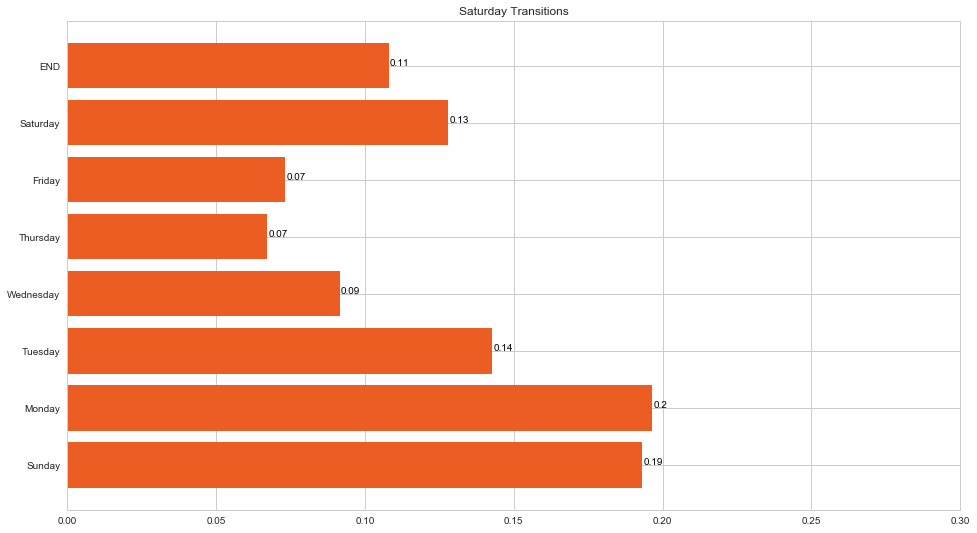

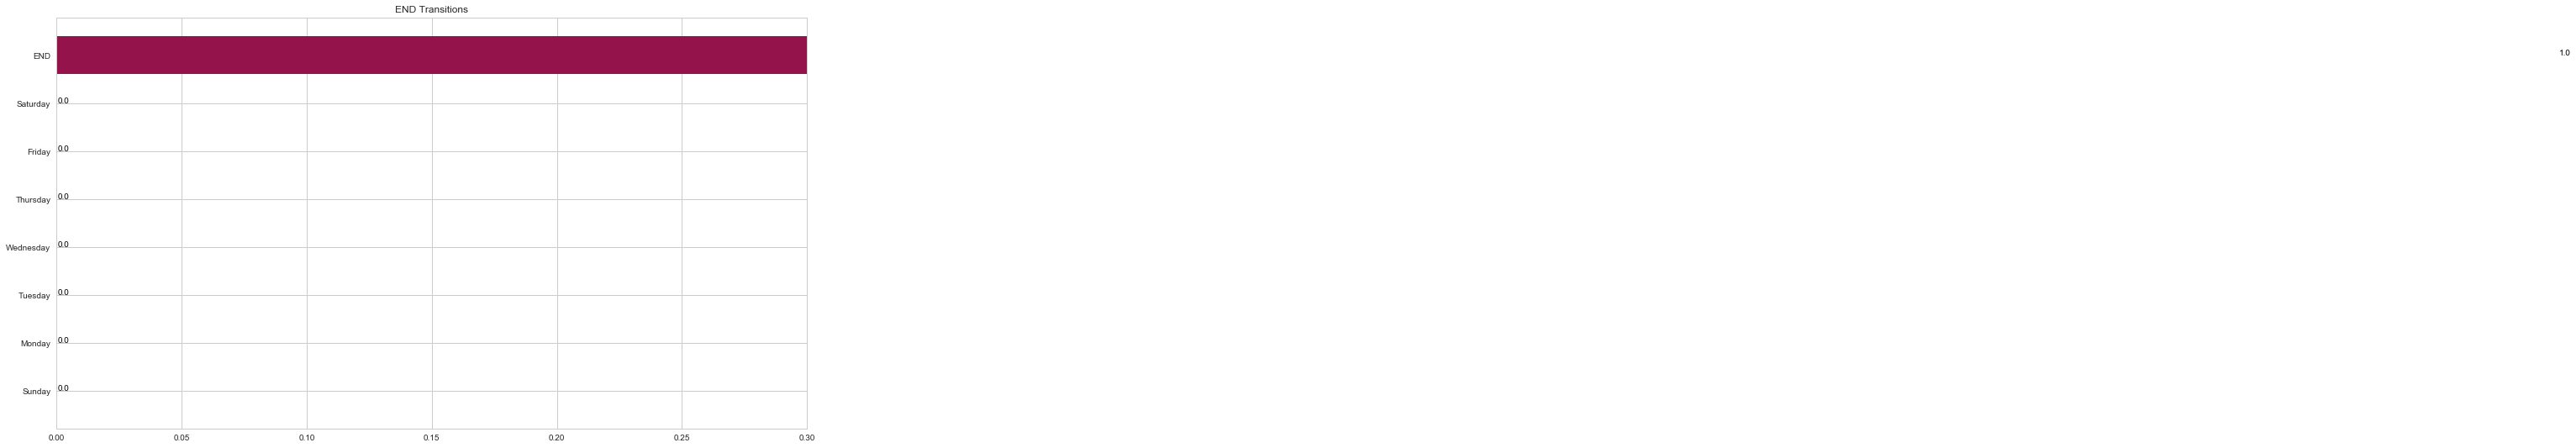

In [9]:
for a,day in enumerate(days):
    plt.figure(figsize=(16,9))
    width=0.8
    ind = np.arange(len(weekdayTransitions.iloc[0,].values))
#     days = days
#     for a in range(len(day)):
    plt.barh(
        ind,
        weekdayTransitions.iloc[a,].values,
        width,
        color=shopColors[a],
        tick_label=days)
    plt.yticks(ind)
    plt.xlim([0, 0.3])
#     plt.yaxis.labels(days, minor=False)
    plt.title('{} Transitions'.format(day))
    for i, v in enumerate(weekdayTransitions.iloc[a,].values):
        plt.text(v + 0.0005, i, str(round(v,2)), color='black', fontweight='light')

    plt.show()

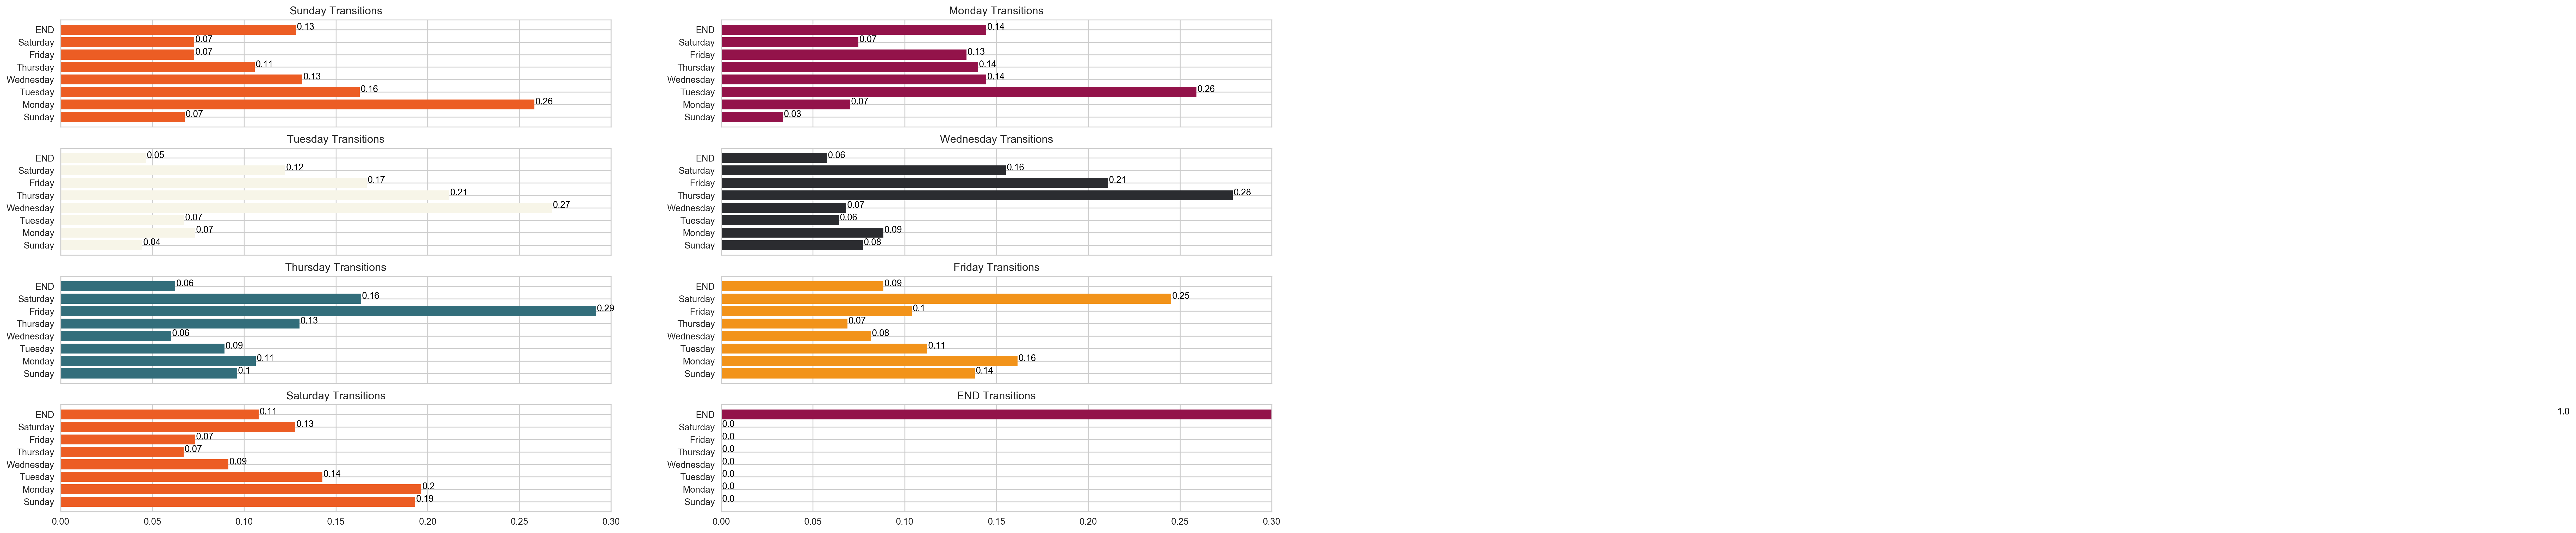

In [10]:
f, axarr = plt.subplots(4, 2,figsize=(24,10), sharex=True, dpi=250)
width=0.8
ind = np.arange(len(weekdayTransitions.iloc[0,].values))
axx = []
for y in axarr.tolist():
    for z in y:
        axx.append(z)
days = days
for a in range(len(axx)):
    axx[a].barh(
        ind,
        weekdayTransitions.iloc[a,].values,
        width,
        color=shopColors[a])
    axx[a].set_yticks(ind)
    axx[a].set_xlim([0, 0.3])
    axx[a].set_yticklabels(days, minor=False)
    axx[a].set_title('{} Transitions'.format(days[a]))
    for i, v in enumerate(weekdayTransitions.iloc[a,].values):
        axx[a].text(v + 0.0005, i, str(round(v,2)), color='black', fontweight='light')

plt.show()

### 3.2.3 Weekday Markov Initial State Distribution - π

The markov initial state distribution shows the proability of a sequemce stating in each of the available states.

In [11]:
weekdayInitial = markovBase[markovBase.shoppingOrder==1].pivot_table(
    index = 'weekdayInteger',
    aggfunc=len)['customerID']
weekdayInitial = weekdayInitial / weekdayInitial.sum()
weekdayInitial.rename(index={k:v for k,v in enumerate(days)}, inplace=True)
weekdayInitial

weekdayInteger
Sunday       0.069
Monday       0.088
Tuesday      0.072
Wednesday    0.225
Thursday     0.198
Friday       0.185
Saturday     0.163
Name: customerID, dtype: float64

Here we can see that the highest probabilty for the begining of a sequence is on Wednesday. This may be due to a number of things. 

Promotions may be more attractive in the middle of the week, setting up for the weekend where there are the most orders placed as shown below or this could be due to how the data is sourced.

In [12]:
# Number of Purchases per weekday - Highest is friday(5) and saturday(6)
for i in range(len(days)-1):
    print("{} - {}".format(days[i], markovBase[markovBase.weekdayInteger==i].shape[0]))

Sunday - 1154
Monday - 1579
Tuesday - 1487
Wednesday - 1528
Thursday - 1759
Friday - 1888
Saturday - 1760


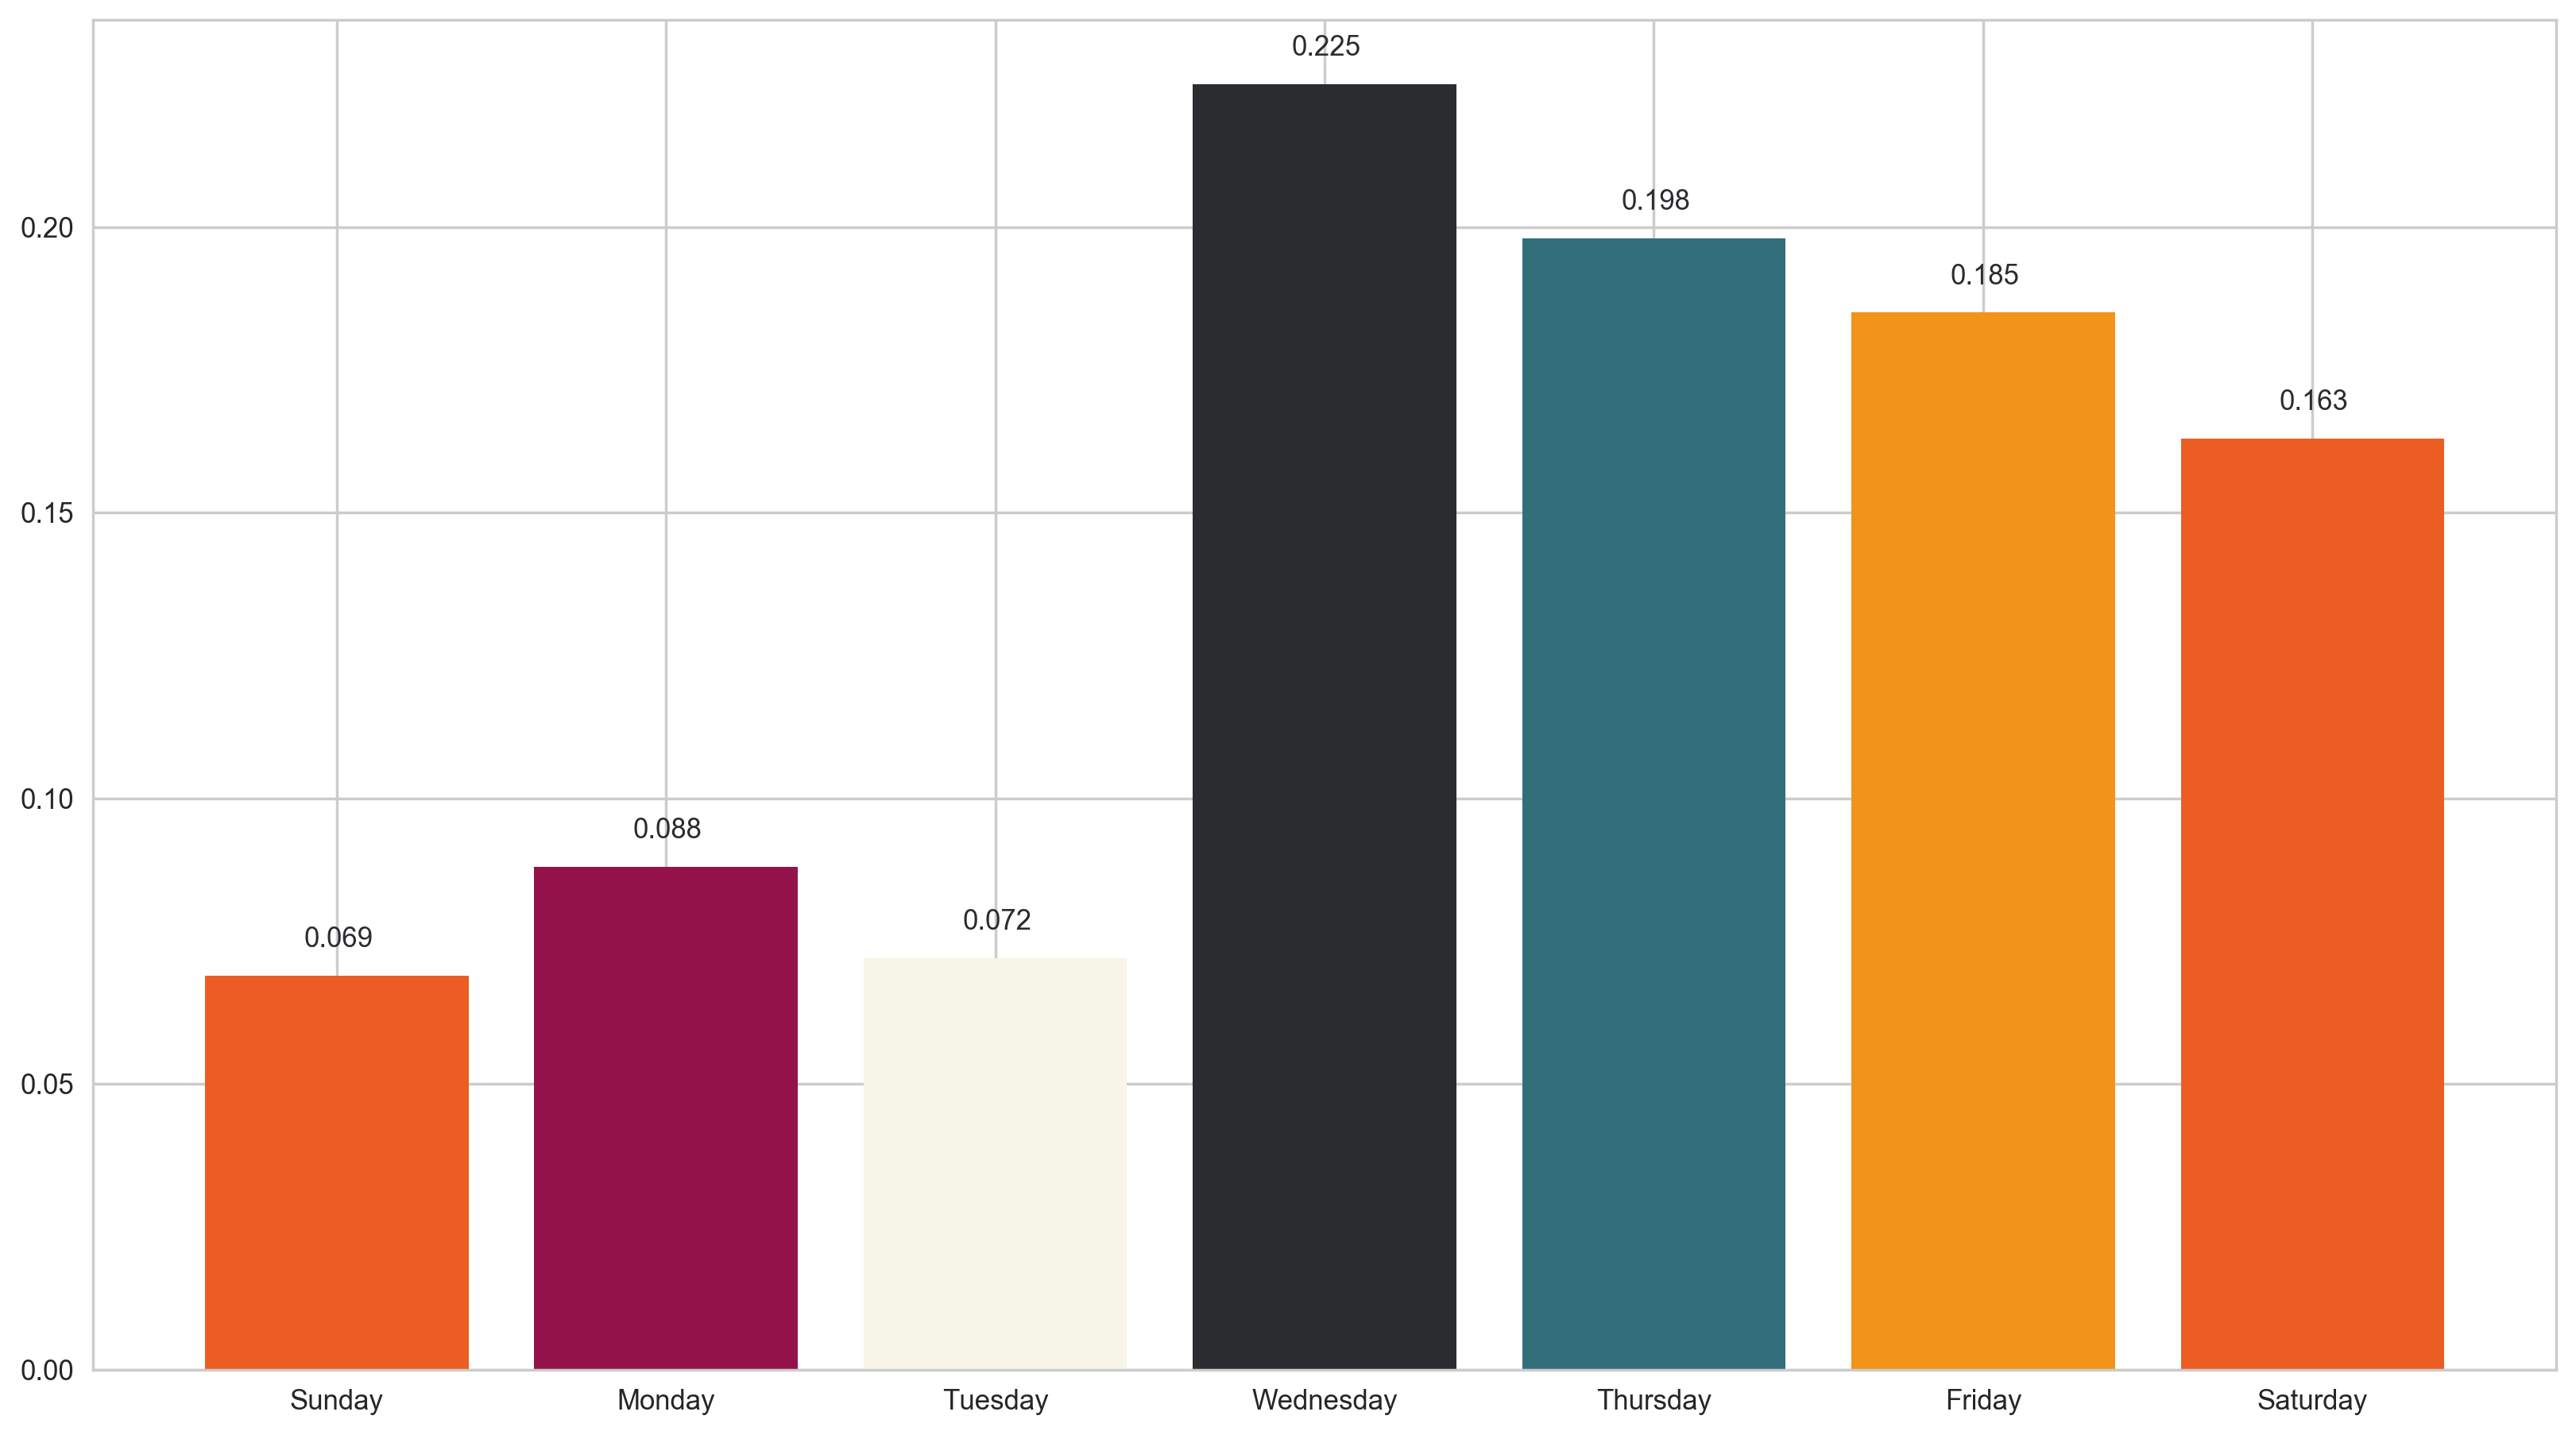

In [13]:
plt.figure(figsize=(16,9),dpi=250)
plt.bar(range(weekdayInitial.shape[0]),weekdayInitial,color=shopColors)
plt.xticks(range(weekdayInitial.shape[0]), days)
for i, v in enumerate(weekdayInitial):
    plt.text(i-0.10, v + 0.005, str(v), color=shopColors[3], fontweight='light')
plt.show()

This model Can be expanded to markov chains
p(s(t)) = πA^t

This model Can be expanded to markov chains

p(s(t)) = πA^t

This can be used to determine the probability of an order being purchased on a particular day t days from now. This can be used to inform stock levels.

This can also be expanded into higher order markov models to develop classification solutions

## 3.3 Channel Markov Model

### 3.3.1 Models

Here we explore the channel through which the order is placed and look at the next channel the next order is likely to be ordered through based on the data provided.

In [14]:
channelTransitions = markovBase.pivot_table(
    index='orderChannel',
    columns='nextOrderChannel',
    aggfunc=len)['customerID'].astype(np.float32)
s = pd.Series({'STR':0,'WEB':0,'END':1.0}); s.name = 'END'
channelTransitions = channelTransitions.append(s)
channelTransitions = channelTransitions.iloc[:,[1,2,0]]
channelTransitions

nextOrderChannel,STR,WEB,END
orderChannel,,,
STR,9770.0,105.0,949.0
WEB,102.0,178.0,51.0
END,0.0,0.0,1.0


In [15]:
for rownum in range(channelTransitions.shape[0]):
    rowsum = channelTransitions.iloc[rownum,:].sum()
    for colnum in range(channelTransitions.shape[1]):
        channelTransitions.iloc[rownum,colnum]=channelTransitions.iloc[rownum,colnum]/rowsum

In [16]:
channelTransitions

nextOrderChannel,STR,WEB,END
orderChannel,,,
STR,0.902624,0.009701,0.087676
WEB,0.308157,0.537764,0.154079
END,0.000000,0.000000,1.000000


Here we can see that once an order is placed within the store, there is a very high probabilty of the next order taking place in the store again.

We can also see that once an order is place online then there is a 53.8% chance that the next order will be online again.

We can also see that orders that are made online are almost twice as likely as orders that are placed in store to be the last time the order is placed. 

(Note: The ending of a sequence can be better defined with more data, eg. if a customer has not ordered after a set long period of time. Here we are modelling based on the data that we have which does not provide the date)

### 3.3.2 Visualisations

Here we plot some visualisations similar to the previous markov model to visualise the relationships highlighted above.

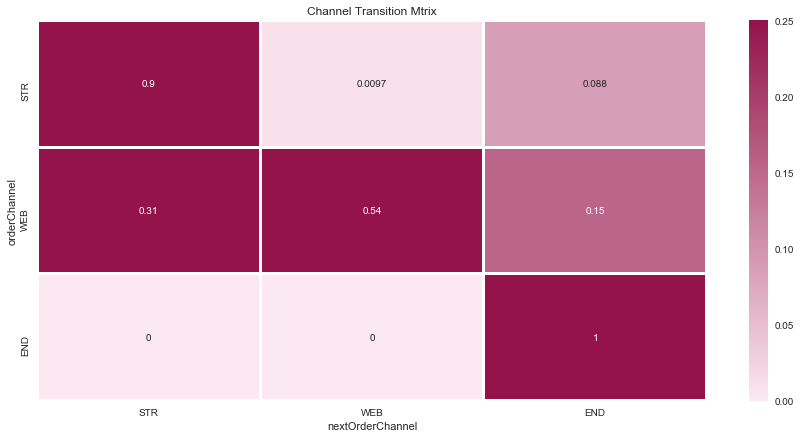

In [17]:
f, ax = plt.subplots(figsize=(15, 7))
cmap = sns.light_palette(shopColors[1], as_cmap=True)
sns.heatmap(
    channelTransitions,
    linewidths=2.0,
    ax=ax,
    annot=True,
    cmap=cmap,
    vmax=.25, vmin=0.0)
ax.set_title('Channel Transition Mtrix')
plt.show()

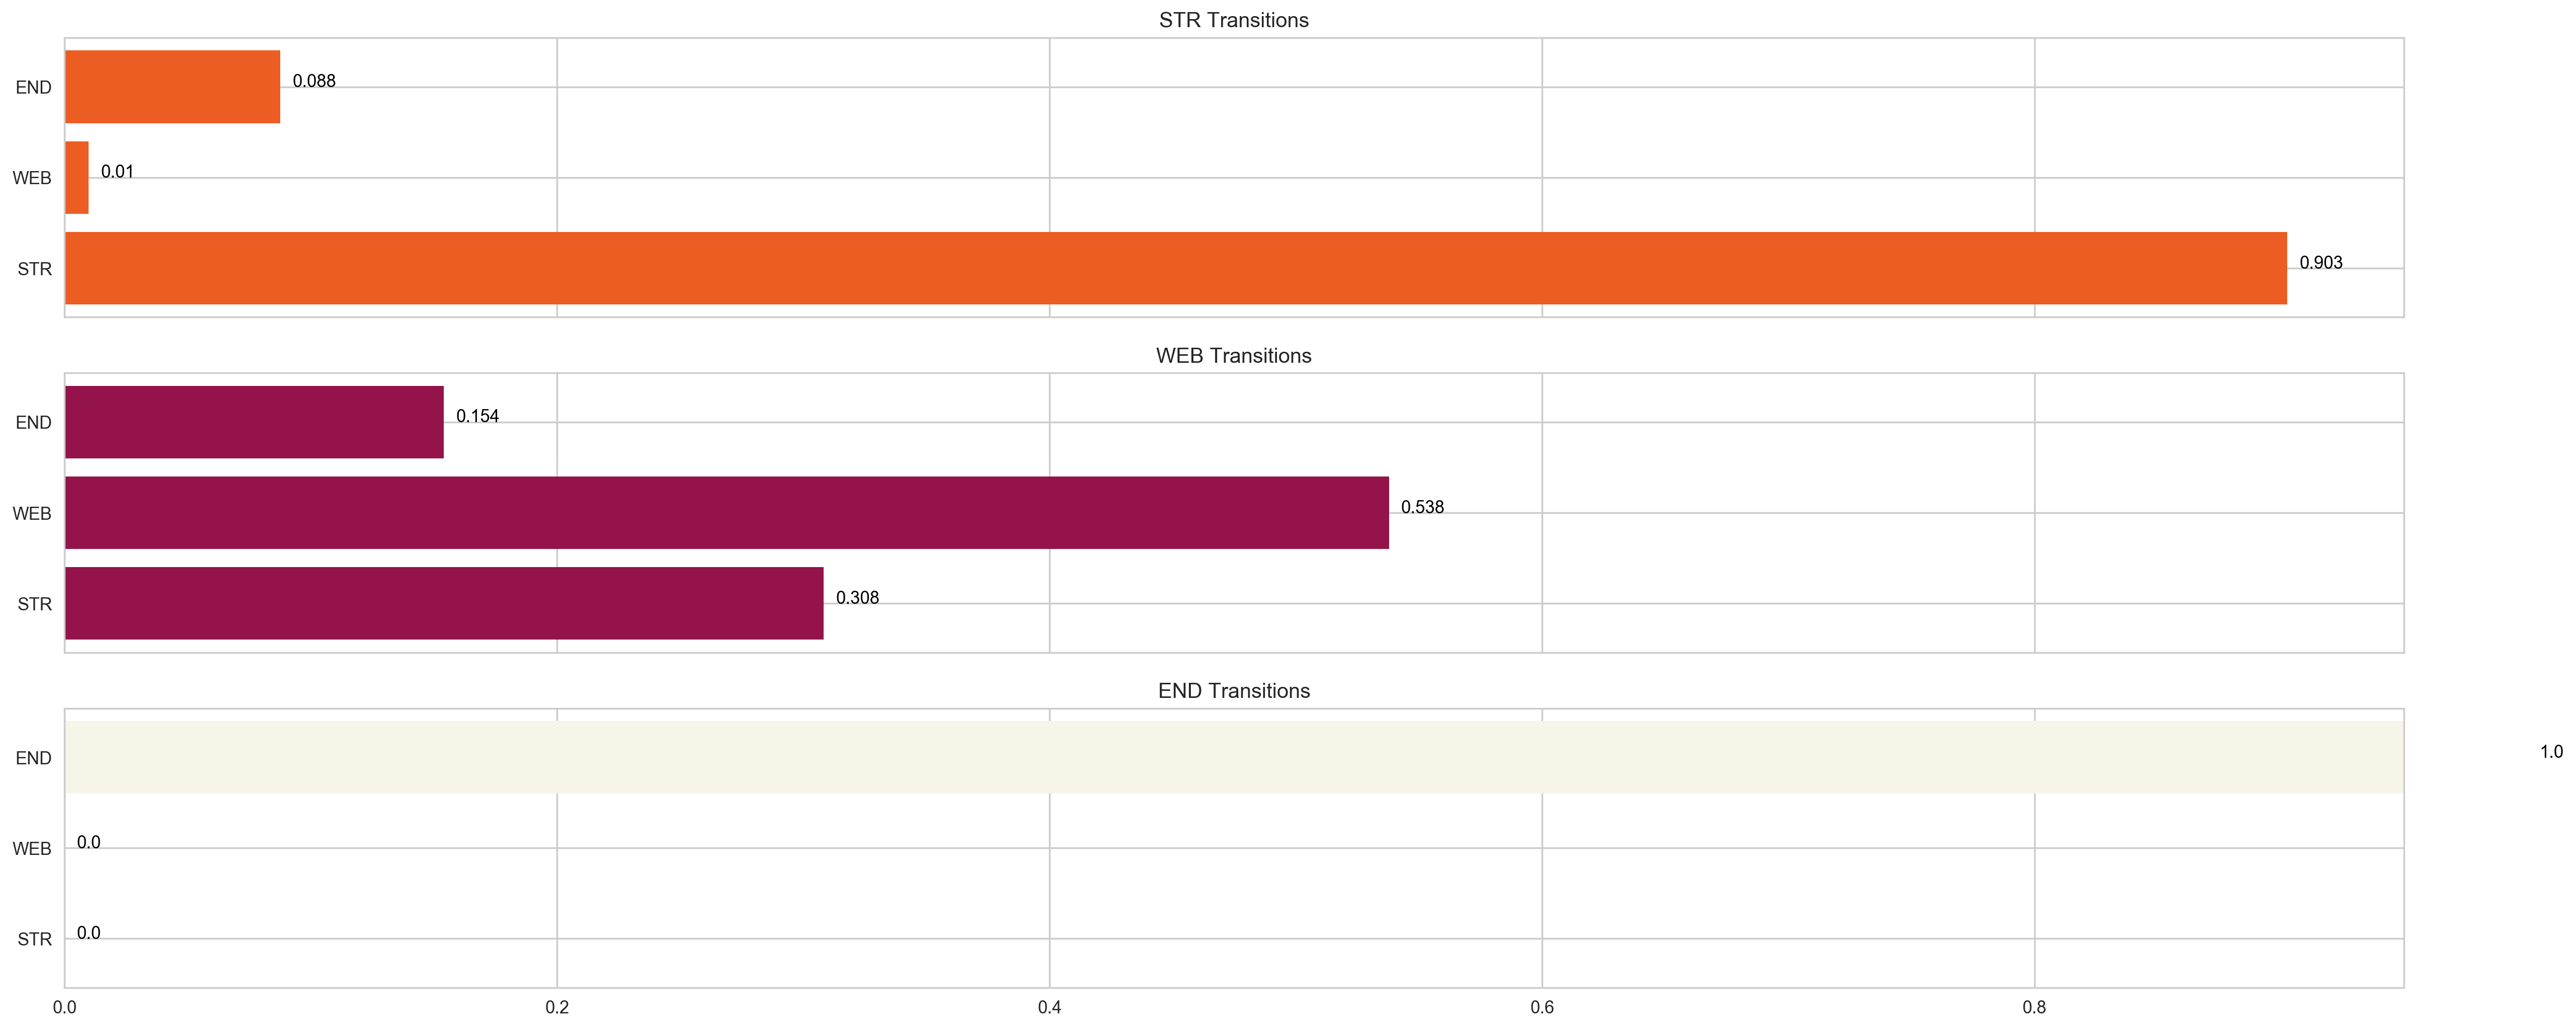

In [18]:
f, axarr = plt.subplots(3, 1,figsize=(24,10), sharex=True, dpi=250)
width=0.8
ind = np.arange(len(channelTransitions.iloc[0,].values))
axx = []
for y in axarr:
    axx.append(y)
days = days
for a in range(len(axx)):
    axx[a].barh(
        ind,
        channelTransitions.iloc[a,].values,
        width,
        color=shopColors[a])
    axx[a].set_yticks(ind)
    axx[a].set_xlim([0, 0.95])
    axx[a].set_yticklabels(channelTransitions.index, minor=False)
    axx[a].set_title('{} Transitions'.format(channelTransitions.index[a]))
    for i, v in enumerate(channelTransitions.iloc[a,].values):
        axx[a].text(v + 0.005, i, str(round(v,3)), color='black', fontweight='light')

plt.show()

### 3.3.3 Channel Markov Initial State Distribution - π

In [19]:
channelInitial = markovBase[markovBase.shoppingOrder==1].pivot_table(
    index = 'orderChannel',
    aggfunc=len)['customerID']
channelInitial = channelInitial / channelInitial.sum()
channelInitial

orderChannel
STR    0.952
WEB    0.048
Name: customerID, dtype: float64

Here we can see that the initial state distribution shows that there is a 95.2% chance that the first order will take place in store and only a 4.8% chance that the first order will be online.

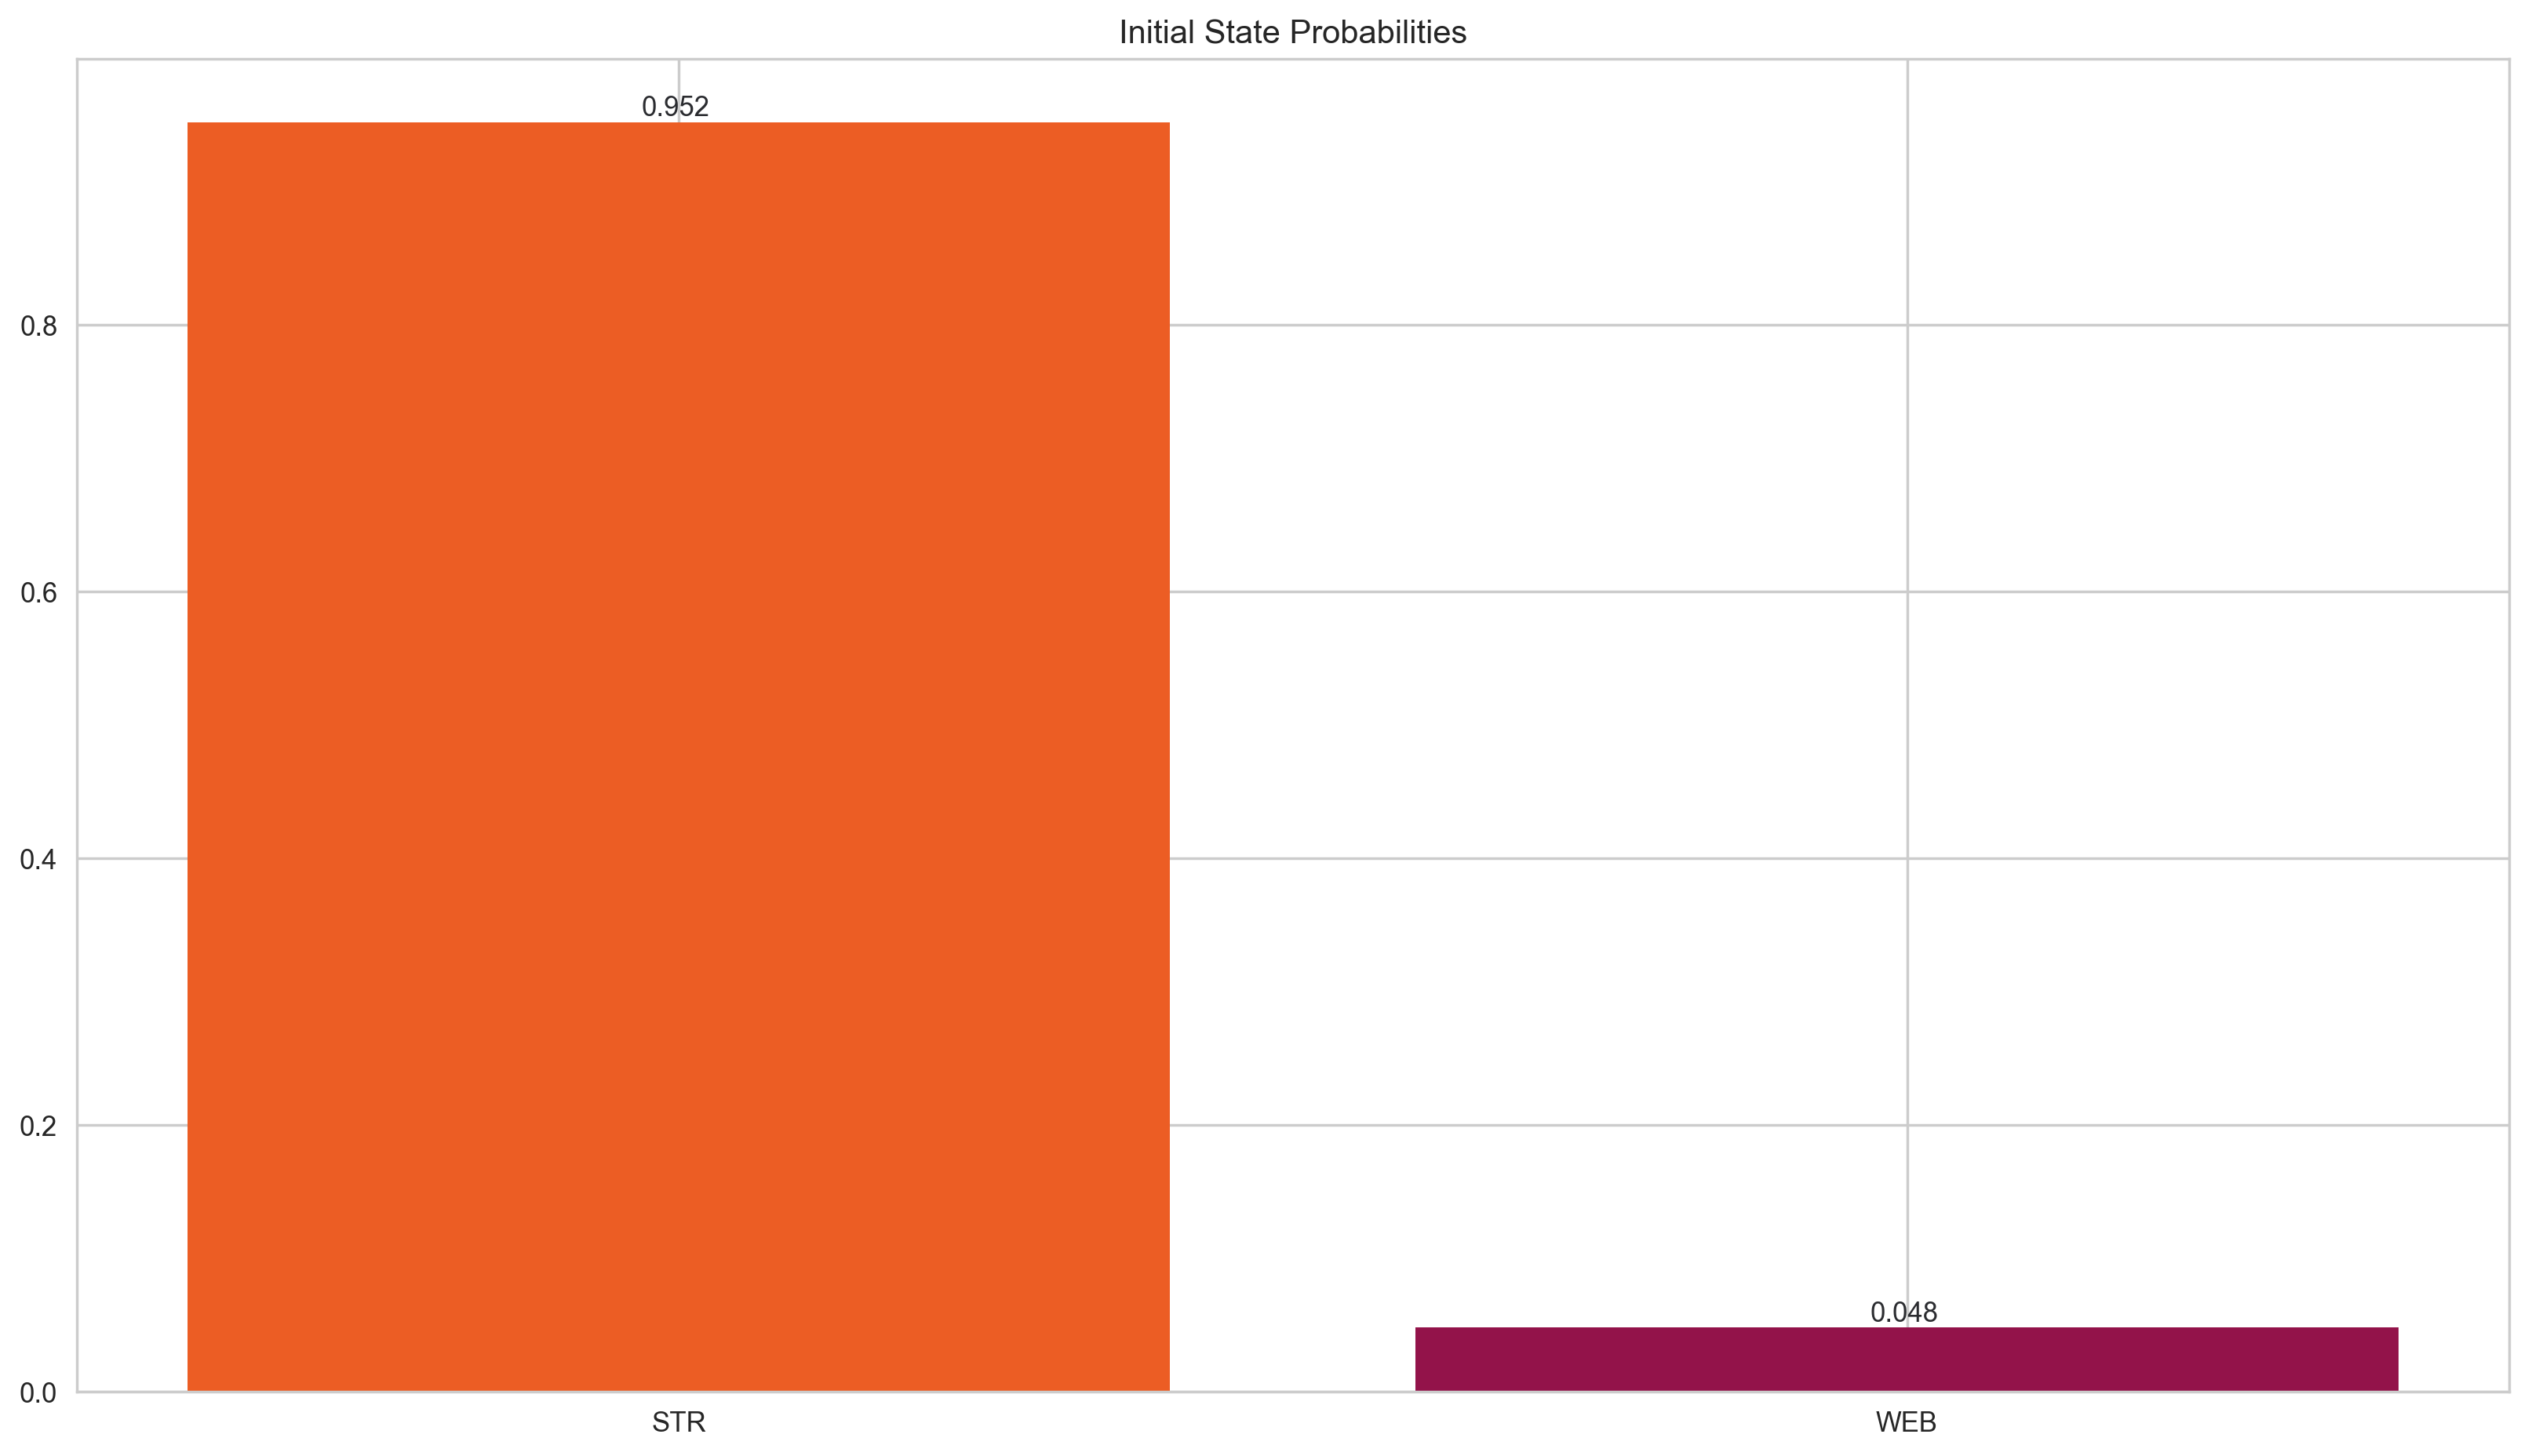

In [20]:
plt.figure(figsize=(16,9),dpi=250)
plt.bar(range(channelInitial.shape[0]),channelInitial,color=shopColors)
plt.xticks(range(channelInitial.shape[0]), channelInitial.index)
for i, v in enumerate(channelInitial):
    plt.text(i-0.03, v + 0.005, str(v), color=shopColors[3], fontweight='light')
plt.title('Initial State Probabilities')
plt.show()

### 3.3.4 Channel Markov Expected Transition

Here we can calculate the number of orders we are likely to expect staying in the same state (channel).

E(n) = 1 / (1 - a)

In [21]:
print('Expected Number of Orders in store before moving to a new state given that they are already in store state:')
1 / (1-channelTransitions['STR']['STR'])

Expected Number of Orders in store before moving to a new state given that they are already in store state:


10.269449715370015

In [22]:
print('Expected Number of Orders online before moving to a new state given that they are already online:')
1 / (1-channelTransitions['WEB']['WEB'])

Expected Number of Orders online before moving to a new state given that they are already online:


2.1633986928104574

What these values mean is if an order is made in store, we would expect the next 10 orders to remain in store and that if an order is made online, we would expect the next 2 orders to be made online before transitioning.

## 3.4 Store Markov Model

Another interesting application is to the store that the order is likely to come from next. Here we generate a matrix much like before but with the using the stores.

### 3.4.1 Model

In [23]:
storeTransitions = markovBase.pivot_table(
    index='storeID',
    columns='nextStoreID',
    aggfunc=len)['customerID'].astype(np.float32)
storeTransitions.head()

nextStoreID,00807a8d0dc27d914672f250e1e0df55c94a42f114e56a6043955a74aa16c076,00bd549474edf774b6c5210b7fe181651633e370c67278d00aee74578937eba1,0158f6eb71a66cfd5ae967a9fc6b0df561f5ae9531391960a7064d990f3b2cb1,016756cfda99945a6ac2ff31b225bf0b82a96990de66bb9183029798fdb21b9c,01d2a6c6285814879cbb27832cae50a46467433c425616d5fdb6a7cf225661a9,01d33d581b94efcf2a5eb049682b0209ff95df60ff088c4f0ceb8904c69e235b,024b48d54a2a0160b3143b5bd47ebd3cea7fbacf644d8360c423f128f0c92dde,0439581c51d4e6c41aef4aee298852d239ec6d1a3152742ed476cdd0d64ac807,04fb1a2fb4d26984a30ec42686743ef48f29327c946b6a7565d791849d6eae29,0530574a10d43d4e2e8ad8ebb1373cfbc00bdd06f7f855c84e09577dfa627179,05df5b7e1bf03a388eafa408383b5578a07969fceaee089a70ddd4a87afd312a,060304059b6f149aab68c6b1f9093720900002a957f8b1f4a7be9132af4e41c5,0608ac73a2839c9b832089ee176c7c05c6dfe071bbc9908c59495090657ba1bc,099517b2a159dcda1d19a30f51388d1c34a5e8e16a0e265ab3b8a2edc9b6d3f4,0a7b9ce7974ef89d418d77c7086ed65da8ceab110318670b879f949cc2edb453,0d14a06c64519c05e1b31199dad83aed355bb97cc3fa142f2977e53563662ff1,0ee68d7616994ac7bdee11367565c78d8d81c4d960770d8fe48580de7230b26c,0f7511e219367dbddb13906068c23911687c3fbffd646b1bbe97d9b54c58ac62,0fdda47ec61adfaba221be6a10477b02800396027a5ae719497ce96f159060ce,10f7cd20b5fde7e61bea56a0ab2405588ddd32c0cee0d93078db8c847f418b54,1130789703ce4e2e20e151c0befb909cec3f0e53e22ce768e65bd0839b969871,11feca2119a87916977fdd2819a294e2204c9ce9ae2595cc5cd2b96f1f264e97,14a43703c41d9f9580306c5a466261b0cfd821665fd4a3ba88bb90520a2a43f8,152d18f0b3d54c1402160eee92a1e5d4bbace7620534598c728c2aa407448feb,15873a88b1d4fd0b7868f4e163b405c5e262f6907ecd84c1c05a41071585d27b,159423cfb93952ab97b2e09990ded122408e826cf70cbb0bd0f76354b2a1c0ec,17016c5567fa0f5a69a6a33205ae809efe00c8d999b2a69cf235f049cc32abc2,173dfbec7286486746ca2690a385c1a7dd7999364b2f0b1e5adf379af803cda5,1b57526c59efac56014da2e3617756044372a450ad56292c5f2509685457f06e,1cf44b679ca614f17b02675491e1da304d55cc18b7c23f7e3a42ae3c68cec437,1d0b2238ed0d05ecf971c2768fa3c3d23a8fecd1e4cb1d993a878f7a9d91c3bd,1d6fbffbdf46a3b5c8e9a39d5b245aa8c0f9e1cdeec3e1b7d9805be3f21dfab4,1db2f4670baed53f4616886b55f69fe0e6f101f1315ba61437528888459c13f2,1f58ccfac219f9d71ac9bb76b59b0a9197019be38bac374186d3b0c6d5b88e12,1f76f626c490c19cf82d14e3794f9012a111a5657efaa3c39d4f99c6a22ef43e,23e840223877c469f10a8c06a16a70c44386fada5a6d32919915e0044ce6a570,244fdfacd3e3046ec05ebe18d93653d535604a54cd13739b2f4d0b4826fe9e29,2465089f3fd988d331b3a69100a039531a232b1899bd0bf6718cfcbd67f43dd3,2483a073b5a01aa5591097b222e5fc56545ab2f7bf9dbec81a15ab0ce31daa88,269834116e80beabece79e75071ed3dad494aea275820633711d27633f823d23,28cf69fbe83577b1a5ebf5c0032585c1ad56edc5ad9b69a856b239e3c05fc26c,2ab14621aa16b1d64d62b9a0c22f7b8f22e3d296a03b5179faf9c924f55a9707,2ce31272a176451035c4d31e866247dd1afe0df79dc31ac46adec620058a0559,2ec546c632d57beacef2773ecbd2e8ae95fa407bc66c5d252f43b031dd9e483d,2ef53477f21c9d904848e3bc9b687894fbabf3ac7ad8582ddd056ed53e16a3d1,3017c24bb8cdac17d9afe85c5efba50db8b123598fc46e0f4bf62fa4876883a2,301aa3de6bb32497ec100ef352ab8a77d5bb1f4c5a6172da683e612e8694c201,31ee2d95ecb50adb87fd65bd5ae8ec51bb68d0795bba4fc0d9d6411ebfad361c,32d9a1f4d1b4f8e5f5314ae2526c033be9574a5f67bbf7176c7285fb16d0c691,333d3d7b40cac6036ec4812b5ae4375aa01da8a55c910dbc3e7b1b55ea5e75cf,333e2ef853435f22f4ff97b4cf0c78191825c291b2570a473363f169a2d56817,337f05d79abb3448cd6e362293d275f8d44f2063da85892d2c10887b473273ee,338b44a2d427605593defad26144ddb80ae23a59d4c436e1a1acaaec90a2f054,35ad222267b865b98dffb99dd22d25e3efe71adc4082b5720334b3974ef70345,36a426043b0991229a6cdb1710a7655bfd07faa7fc2feb0c30c56f079b9d73b7,37f7bce11f18662e00ac758273c8cc7ddf2b846968ebefcad45a6b1b4b5dcb08,386786de4e571428ebc23698d6075953dcfae8342979ddc179c58ca3f2454e38,38ad64bba88d7681ba1a2d51120662db8df9c24af2f2ea1673503e9729c753ff,3935e4011fd2f052b952662025c8d45731012a22a34fd14795cfc76c68519313,3adac74c103f621c08a9871a5f8c946e25fe30ad3522ac72d031e33b404f1ab7,3bfa7f72f4f3c6a06fc244b68dfbe8e0eea24a931a8fb2aae49cff0f1963e6d9,3d6e532fc394af63394d127

### 3.4.2 Smoothing (ε=5e-3)

As we can see, this is a very sparse dataset due to the large number of states (stores) that an order can take (there are many locations). With 250+ locations, this presents (250+)^2 combinations! We dont have enough data to cater for all these possibilities.

Therefore, to address the NaNs we fill in with 0s and to remove 0 probabilities, we apply smoothing to the data. I chose to use ε as 5e-3 as a smoothing coefficient to the data.

general formula: A(i,j) = {c(i->j)+ε} / {c(i)+εV}

In [24]:
storeTransitions.fillna(0,inplace=True)
e = 5e-3
for rownum in range(storeTransitions.shape[0]):
    smoothrowsum = storeTransitions.iloc[rownum,:].sum() + (storeTransitions.shape[0]*e)
    for colnum in range(storeTransitions.shape[1]):
        storeTransitions.iloc[rownum,colnum] = (storeTransitions.iloc[rownum,colnum]+e) / smoothrowsum

In [25]:
storeTransitions.sample(5)

nextStoreID,00807a8d0dc27d914672f250e1e0df55c94a42f114e56a6043955a74aa16c076,00bd549474edf774b6c5210b7fe181651633e370c67278d00aee74578937eba1,0158f6eb71a66cfd5ae967a9fc6b0df561f5ae9531391960a7064d990f3b2cb1,016756cfda99945a6ac2ff31b225bf0b82a96990de66bb9183029798fdb21b9c,01d2a6c6285814879cbb27832cae50a46467433c425616d5fdb6a7cf225661a9,01d33d581b94efcf2a5eb049682b0209ff95df60ff088c4f0ceb8904c69e235b,024b48d54a2a0160b3143b5bd47ebd3cea7fbacf644d8360c423f128f0c92dde,0439581c51d4e6c41aef4aee298852d239ec6d1a3152742ed476cdd0d64ac807,04fb1a2fb4d26984a30ec42686743ef48f29327c946b6a7565d791849d6eae29,0530574a10d43d4e2e8ad8ebb1373cfbc00bdd06f7f855c84e09577dfa627179,05df5b7e1bf03a388eafa408383b5578a07969fceaee089a70ddd4a87afd312a,060304059b6f149aab68c6b1f9093720900002a957f8b1f4a7be9132af4e41c5,0608ac73a2839c9b832089ee176c7c05c6dfe071bbc9908c59495090657ba1bc,099517b2a159dcda1d19a30f51388d1c34a5e8e16a0e265ab3b8a2edc9b6d3f4,0a7b9ce7974ef89d418d77c7086ed65da8ceab110318670b879f949cc2edb453,0d14a06c64519c05e1b31199dad83aed355bb97cc3fa142f2977e53563662ff1,0ee68d7616994ac7bdee11367565c78d8d81c4d960770d8fe48580de7230b26c,0f7511e219367dbddb13906068c23911687c3fbffd646b1bbe97d9b54c58ac62,0fdda47ec61adfaba221be6a10477b02800396027a5ae719497ce96f159060ce,10f7cd20b5fde7e61bea56a0ab2405588ddd32c0cee0d93078db8c847f418b54,1130789703ce4e2e20e151c0befb909cec3f0e53e22ce768e65bd0839b969871,11feca2119a87916977fdd2819a294e2204c9ce9ae2595cc5cd2b96f1f264e97,14a43703c41d9f9580306c5a466261b0cfd821665fd4a3ba88bb90520a2a43f8,152d18f0b3d54c1402160eee92a1e5d4bbace7620534598c728c2aa407448feb,15873a88b1d4fd0b7868f4e163b405c5e262f6907ecd84c1c05a41071585d27b,159423cfb93952ab97b2e09990ded122408e826cf70cbb0bd0f76354b2a1c0ec,17016c5567fa0f5a69a6a33205ae809efe00c8d999b2a69cf235f049cc32abc2,173dfbec7286486746ca2690a385c1a7dd7999364b2f0b1e5adf379af803cda5,1b57526c59efac56014da2e3617756044372a450ad56292c5f2509685457f06e,1cf44b679ca614f17b02675491e1da304d55cc18b7c23f7e3a42ae3c68cec437,1d0b2238ed0d05ecf971c2768fa3c3d23a8fecd1e4cb1d993a878f7a9d91c3bd,1d6fbffbdf46a3b5c8e9a39d5b245aa8c0f9e1cdeec3e1b7d9805be3f21dfab4,1db2f4670baed53f4616886b55f69fe0e6f101f1315ba61437528888459c13f2,1f58ccfac219f9d71ac9bb76b59b0a9197019be38bac374186d3b0c6d5b88e12,1f76f626c490c19cf82d14e3794f9012a111a5657efaa3c39d4f99c6a22ef43e,23e840223877c469f10a8c06a16a70c44386fada5a6d32919915e0044ce6a570,244fdfacd3e3046ec05ebe18d93653d535604a54cd13739b2f4d0b4826fe9e29,2465089f3fd988d331b3a69100a039531a232b1899bd0bf6718cfcbd67f43dd3,2483a073b5a01aa5591097b222e5fc56545ab2f7bf9dbec81a15ab0ce31daa88,269834116e80beabece79e75071ed3dad494aea275820633711d27633f823d23,28cf69fbe83577b1a5ebf5c0032585c1ad56edc5ad9b69a856b239e3c05fc26c,2ab14621aa16b1d64d62b9a0c22f7b8f22e3d296a03b5179faf9c924f55a9707,2ce31272a176451035c4d31e866247dd1afe0df79dc31ac46adec620058a0559,2ec546c632d57beacef2773ecbd2e8ae95fa407bc66c5d252f43b031dd9e483d,2ef53477f21c9d904848e3bc9b687894fbabf3ac7ad8582ddd056ed53e16a3d1,3017c24bb8cdac17d9afe85c5efba50db8b123598fc46e0f4bf62fa4876883a2,301aa3de6bb32497ec100ef352ab8a77d5bb1f4c5a6172da683e612e8694c201,31ee2d95ecb50adb87fd65bd5ae8ec51bb68d0795bba4fc0d9d6411ebfad361c,32d9a1f4d1b4f8e5f5314ae2526c033be9574a5f67bbf7176c7285fb16d0c691,333d3d7b40cac6036ec4812b5ae4375aa01da8a55c910dbc3e7b1b55ea5e75cf,333e2ef853435f22f4ff97b4cf0c78191825c291b2570a473363f169a2d56817,337f05d79abb3448cd6e362293d275f8d44f2063da85892d2c10887b473273ee,338b44a2d427605593defad26144ddb80ae23a59d4c436e1a1acaaec90a2f054,35ad222267b865b98dffb99dd22d25e3efe71adc4082b5720334b3974ef70345,36a426043b0991229a6cdb1710a7655bfd07faa7fc2feb0c30c56f079b9d73b7,37f7bce11f18662e00ac758273c8cc7ddf2b846968ebefcad45a6b1b4b5dcb08,386786de4e571428ebc23698d6075953dcfae8342979ddc179c58ca3f2454e38,38ad64bba88d7681ba1a2d51120662db8df9c24af2f2ea1673503e9729c753ff,3935e4011fd2f052b952662025c8d45731012a22a34fd14795cfc76c68519313,3adac74c103f621c08a9871a5f8c946e25fe30ad3522ac72d031e33b404f1ab7,3bfa7f72f4f3c6a06fc244b68dfbe8e0eea24a931a8fb2aae49cff0f1963e6d9,3d6e532fc394af63394d127

This can be used as a lookup to predict which store a customer is likely to visit next given their last visit. 

This can be combined with a number of markov models to create a system of models to predict customers' order behaviour. The smoothing coefficient (ε) can be adjusted to provide more/less restriction to probabilities in other stores.

In [26]:
sampleStore = storeTransitions.sample().index[0]
storeTransitions.loc[sampleStore,:].sort_values(ascending=False).head()

nextStoreID
e0c83e1fa12f76607aed0e739d2c9e50c96fa6853d899f7c560355755aea1831    0.194944
9123ae8dce2dd538b2418d75463bab5e54131b95908caab92c5813584d3d4678    0.194944
e196fb3c487b3c820db194a2a28c6feaf00342b7b24c3a2c6f4f69d45b20e088    0.097715
460498baf2506d78cad65ee70138f9ecf3d0324cdcaea8b7e8bd8775bf7b525d    0.097715
END                                                                 0.097715
Name: 460498baf2506d78cad65ee70138f9ecf3d0324cdcaea8b7e8bd8775bf7b525d, dtype: float32

# END